**[This walkthrough is also available as a Jupyter ipynb Notebook - you can run yourself](notebooks/g_visualization.ipynb)**

Half of the fun with Jupyter Notebooks is organizing the data how you want.

But the most important part is how you can tell a story with that data.

The `jupyter-ijavascript-utils` library tries to give you a few different options:

# Showing your data through a Table

In [1]:
utils = require('jupyter-ijavascript-utils');
['utils'];

[ 'utils' ]

In [2]:
JSON.stringify(
    utils.datasets.list().slice(0, 10)
);

'["annual-precip.json","anscombe.json","barley.json","budget.json","budgets.json","burtin.json","cars.json","countries.json","crimea.json","driving.json"]'

In [3]:
utils.ijs.await(async($$, console) => {
    cars = await utils.datasets.fetch('cars.json');
    console.log(`You have loaded ${cars.length} number of cars`);
});

You have loaded 406 number of cars


**For more on tables, see the [Exporting and Tables tutorial](https://jupyter-ijavascript-utils.onrender.com/tutorial-h_exporting.html)**

In [4]:
utils.table(cars)
    .limit(10)
    .filter((car) => car.Name.startsWith('chevrolet'))
    .sort('-Name')
    .styleRow(({record}) => record.Miles_per_Gallon > 20
             ? 'background-color:lightcyan' : '')
    .render(10);

Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
chevrolet woody,24.5,4,98,60,"2,164",22.1,1976-01-01,USA
chevrolet vega 2300,28,4,140,90,"2,264",15.5,1971-01-01,USA
chevrolet vega (sw),22,4,140,72,"2,408",19,1971-01-01,USA
chevrolet vega,20,4,140,90,"2,408",19.5,1972-01-01,USA
chevrolet vega,21,4,140,72,"2,401",19.5,1973-01-01,USA
chevrolet vega,25,4,140,75,"2,542",17,1974-01-01,USA
chevrolet nova custom,16,6,250,100,"3,278",18,1973-01-01,USA
chevrolet nova,15,6,250,100,"3,336",17,1974-01-01,USA
chevrolet nova,18,6,250,105,"3,459",16,1975-01-01,USA
chevrolet nova,22,6,250,105,"3,353",14.5,1976-01-01,USA


# Showing Through Vega Charts

For more, see the [Vega Charting Tutorial](http://localhost:8080/tutorial-vegaLite1.html)

## Vega-Lite

[Vega-Lite](https://vega.github.io/vega-lite) is a charting library that provides a great deal of flexibility and interaction
while also allowing for very simple use cases <br />
(and further simplified with [Vega-Lite-Api](https://vega.github.io/vega-lite-api/))
 
![Screenshot of vega lite examples from vega-lite home](../img/vegaLiteExamples.png)

More examples and detail can be found on the [Vega module](https://jupyter-ijavascript-utils.onrender.com/module-vega.html)

## Vega

It is built on [Vega](https://vega.github.io/vega/) that uses [d3 as a visualization kernel](https://vega.github.io/vega/about/vega-and-d3/).

True [Vega](https://vega.github.io/vega/) is also supported, providing support for additional capabilities
(that to my knowledge cannot be done with vega-lite)
 *  such as [Radar Charts](https://vega.github.io/vega/examples/radar-chart/),
 * [Contour Plots](https://vega.github.io/vega/examples/contour-plot/),
 * [Tree Layouts](https://vega.github.io/vega/examples/tree-layout/),
 * [Force Plots](https://vega.github.io/vega/examples/force-directed-layout/),
 * and others.

![Screenshot of Vega Charts](../img/vegaChartExamples.jpg)

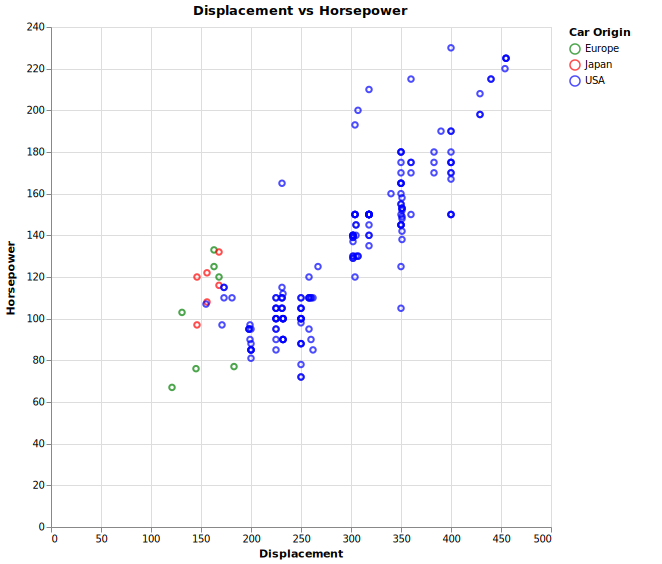

In [5]:
utils.vega.svg((vl) => vl.markPoint()
  .data(cars)
  .title('Displacement vs Horsepower')
  .width(500)
  .height(500)
  .transform(
    vl.filter('datum.Cylinders > 4')
  )
  .encode(
    //-- Qualitiative field - a number
    //-- that can have the position determined relative to another and charted
    vl.x().fieldQ('Displacement'),
    vl.y().fieldQ('Horsepower'),
    vl.color().fieldN('Origin').title('Car Origin').scale({ range: ['green', 'red', 'blue'] })
  )
)

![Screenshot of chart](../img/CarsDisplacementByHorsepower.png)

## Data Driven Maps

![Map example](../img/choropleth_workingFull.svg)

## Interactive Charts

![Screenshot of Vega-Lite with Sliders](../img/vegaLiteSliders.png)

## Rendering Maps

You can use the [Leaflet]() module to render maps, or markers.

This leverages [Leaflet](https://leafletjs.com/) and [Leaflet-Provider](https://leaflet-extras.github.io/leaflet-providers/preview/)  to help you show locations, geometries, etc.

Please see the [leaflet module for more](https://jupyter-ijavascript-utils.onrender.com/module-leaflet.html)

In [6]:
utils.leaflet.renderMarkers([
  [52.230020586193795, 21.01083755493164, "point 1"],
  [52.22924516170657, 21.011320352554325, "point 2"],
  [52.229511304688444, 21.01270973682404, "point 3"],
  [52.23040500771883, 21.012146472930908, "point 4"]
], {height: 400, provider: 'Stamen.Watercolor'});

![Screenshot of map](../img/leafletRenderMarkers.png)

# Render Equations using Latex

Both [LaTeX](https://www.latex-project.org/) and [KaTeX](https://katex.org/) are supported.

[LaTeX](https://www.latex-project.org/) is a typesetting engine often used for writing mathematical formulas
along with technical and scientific documentation.
 
[KaTeX](https://katex.org/) is a very fast typesetting library specifically to write math notation.
It implements a subset of the LaTeX specification. 

Please see the [latex module for more](https://jupyter-ijavascript-utils.onrender.com/module-latex.html)

In [7]:
utils.latex.render(String.raw`Given : $\pi = 3.14$ , $\alpha = \frac{3\pi}{4}\, rad$
$$
\omega = 2\pi f \\
f = \frac{c}{\lambda}\\
\lambda_0=\theta^2+\delta\\
\Delta\lambda = \frac{1}{\lambda^2}
$$`);

![Screenshot of Latex](../img/latexExample.png)

# Render Diagrams through PlantUML

PlantUML Render diagrams in Jupyter Lab Renderer for PlantUML - a rendering engine that converts text to diagrams.

![Screenshot with PlantUML](../img/plantumlSequence.png)

  All PlantUML diagrams are supported - as they are managed by the server.
  
  Such as:
*  <a href="https://plantuml.com/sequence-diagram">Sequence diagrams</a>,
*  <a href="https://plantuml.com/use-case-diagram">Usecase diagrams</a>,
*  <a href="https://plantuml.com/class-diagram">Class diagrams</a>,
*  <a href="https://plantuml.com/object-diagram">Object diagrams</a>,
*  <a href="https://plantuml.com/activity-diagram-beta">Activity diagrams</a>,
*  <a href="https://plantuml.com/component-diagram">Component diagrams</a>,
*  <a href="https://plantuml.com/deployment-diagram">Deployment diagrams</a>,
*  <a href="https://plantuml.com/state-diagram">State diagrams</a>,
*  <a href="https://plantuml.com/timing-diagram">Timing diagrams</a>,
*  and many others...

  ![Screenshot of types of PlantUML Diagrams](../img/plantUmlDiagrams.jpg)
  
Please see the [PlantUML module for more](https://jupyter-ijavascript-utils.onrender.com/module-plantuml.html)

# Dynamically Generate SVGs for Diagrams

The utility here is a wrapper for [SVG.js](https://svgjs.dev/),
 so SVGs can be rendered either Server-Side (within the Notebook)
 or Client Side (within the browser rendering the notebook - but lost on export)


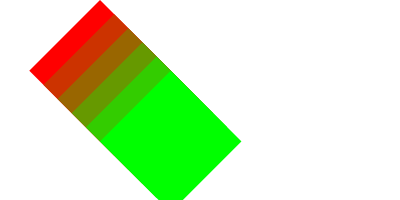

In [8]:
  utils.svg.render({ width: 400, height: 200,
      onReady: ({el, width, height, SVG }) => {
          const yellowTransition = new SVG.Color('#FF0000').to('#00FF00');
          for (let i = 0; i <=5; i++){
              el.rect(100, 100)
                  .fill(yellowTransition.at(i * 0.2).toHex())
                  .transform(
                      new SVG.Matrix()
                          .translate(i * 20, 0)
                          .rotate(45)
                          .translate(100, 0)
                  );
          }
      }
  })


![Screenshot](../img/svgRender_3.svg)

This also can be rendered on the client side to create your own animations.

In [9]:
utils.svg.embed(({ el, SVG, width, height }) => {
    var rect1 = el.rect(100, 100)
        .move(width/2, 0);

    rect1.animate(1000, 0, 'absolute')
        .move(width/2, 100)
        .loop(true, true);
})

![Screenshot of animation](../img/svgAnimation1.gif)

Leveraging [Noise](https://jupyter-ijavascript-utils.onrender.com/tutorial-noiseVisualization.html) you can make some very interesting images even without data.

![Screenshot of animation](../img/noiseFinal.gif)

# Extending with HTML Script

By balancing computing between the client and the browser side (through [HTMLScript]()) you can leverage additional libraries that can use the DOM.

![Screenshot](../img/htmlScript_qrCode.png)
              
        
For more, please see the [Architecture section](https://jupyter-ijavascript-utils.onrender.com/tutorial-architecture.html)
and the [HTMLScript tutorial](https://jupyter-ijavascript-utils.onrender.com/tutorial-d_htmlScriptAnimating.html)